### Features: overall_qual, total_bsmt_sf, gr_liv_area, garage_area, neighborhood, exter_qual, foundation, bsmt_qual, kitchen_qual

These predictive features are purely based on statistical correlation and learnings from the prior model where room for accuracy was observed.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Get cleaned data

In [8]:
train_d = pd.read_csv('../datasets/train-data-clean-imputed-1.1.csv')

In [9]:
train_d.shape

(1967, 67)

In [10]:
train_d.head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,electrical,kitchen_qual,functional,paved_drive,sale_type
0,109,533352170,60,13517,6,8,1976,2005,289.0,533.0,...,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Y,WD
1,544,531379050,60,11492,7,5,1996,1997,132.0,637.0,...,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Y,WD
2,153,535304180,20,7922,5,7,1953,2007,0.0,731.0,...,No,GLQ,Unf,GasA,TA,SBrkr,Gd,Typ,Y,WD
3,318,916386060,60,9802,5,5,2006,2007,0.0,0.0,...,No,Unf,Unf,GasA,Gd,SBrkr,TA,Typ,Y,WD
4,255,906425045,50,14235,6,8,1900,1993,0.0,0.0,...,No,Unf,Unf,GasA,TA,SBrkr,TA,Typ,N,WD


In [11]:
train_d.columns

Index(['id', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars',
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',
       'yr_sold', 'saleprice', 'ms_zoning', 'lot_shape', 'land_contour',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heatin

## Model developement:

### Matrixes

In [12]:
train_m = train_d[['overall_qual', 'total_bsmt_sf', 'gr_liv_area', 'garage_area', 'neighborhood', 'exter_qual', 'foundation', 'bsmt_qual', 'kitchen_qual']].copy()

In [13]:
train_m.head()

,overall_qual,total_bsmt_sf,gr_liv_area,garage_area,neighborhood,exter_qual,foundation,bsmt_qual,kitchen_qual
0,6,725.0,1479,475.0,Sawyer,Gd,CBlock,TA,Gd
1,7,913.0,2122,559.0,SawyerW,Gd,PConc,Gd,Gd
2,5,1057.0,1057,246.0,NAmes,TA,CBlock,TA,Gd
3,5,384.0,1444,400.0,Timber,TA,PConc,Gd,TA
4,6,676.0,1445,484.0,SawyerW,TA,PConc,Fa,TA


In [14]:
X = train_m
y = train_d['saleprice']


In [15]:
# Dummifying categorical variables
X_dummy = pd.get_dummies(X, columns = ['neighborhood', 'exter_qual', 'foundation', 'bsmt_qual', 'kitchen_qual'], drop_first = True)
X_dummy.head()

,overall_qual,total_bsmt_sf,gr_liv_area,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,foundation_PConc,foundation_Stone,foundation_Wood,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
0,6,725.0,1479,475.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,7,913.0,2122,559.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,5,1057.0,1057,246.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,5,384.0,1444,400.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,6,676.0,1445,484.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


Train/Test split splits the data into a training set (70% in this case) and a testing set (30% of data). This allows you to see how well your model performs on unseen data.

In [16]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, train_size=.7, random_state=42)

X_train.head()

,overall_qual,total_bsmt_sf,gr_liv_area,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,foundation_PConc,foundation_Stone,foundation_Wood,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
1304,6,1362.0,1362,504.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
774,4,572.0,572,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1814,5,1214.0,1214,461.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
613,7,798.0,1954,431.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1537,8,1141.0,2263,420.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


## MLR model 1.1: 

In [17]:
# Instantiate model
lr = LinearRegression()

Cross validation allows you to see how well your model performs on unseen data several times. This prevents a good or bad score due to randomness from occurring and gives you more evidence on whether your model is good.

In [18]:
# Training Cross Val
cross_val_score(lr, X_train, y_train).mean()

0.8806541974866479

In [19]:
# Testing Cross Val
cross_val_score(lr, X_test, y_test).mean()

0.8441812706968432

In [20]:
# Fit the model on training data
lr.fit(X_train, y_train)

LinearRegression()

R-squared metric is the percentage of the variability in the target that can be explained by the x-variables in the mode. (relative to a model with no predictors)

In [21]:
# Training score (R2)
lr.score(X_train, y_train)

0.8901453671638222

In [22]:
# Testing score (R2)
lr.score(X_test, y_test)

0.8654334420021894

We can observe that aproximately 88% of the variablity in "saleprice" can be explained by the predictive features of the model. Much better than the prior model.

#### Observing slight high-variance:
Variance is a measure of how overfit or complicated your model is. In other words, variance is how bad your model is at generalizing to new data. High variance means a model does not perform well on new data and should be simplified. This can be achieved by using fewer features or regularizing.

#### Let's check the residuals! (errors)

In [23]:
# Let's create predictions!
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [24]:
# MSE for training
mean_squared_error(y_true=y_train, y_pred=train_preds)

671533017.8441725

In [25]:
# MSE for testing
mean_squared_error(y_true=y_test, y_pred=test_preds)

873728065.8350023

Mean Squared Error (MSE): The average of the squared residuals. Represents average distance squared from the predicted value.

#### MSE metric can corroborate the slight high-variance due to having reduced MSE score on the training data than the testing one.
(performs better on training than testing)

In [26]:
# RMSE for training
mean_squared_error(y_true=y_train, y_pred=train_preds, squared=False)

25913.95411441821

In [27]:
# RMSE for testing
mean_squared_error(y_true=y_test, y_pred=test_preds, squared=False)

29558.891485219847

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

In [28]:
# Look at the coefficients
lr.coef_

array([ 1.10170922e+04,  3.37306924e+01,  4.74522223e+01,  4.32121088e+01,
       -1.27976571e+04, -1.01501377e+04,  4.05739701e+03,  3.07622572e+04,
        8.21195857e+03,  2.38139027e+04, -6.66225098e+03,  1.23649302e+04,
       -2.07863400e+04,  1.33207410e+05, -1.12661569e+04, -3.00133252e-10,
       -6.79592986e+03,  7.49101677e+03,  2.19214638e+03, -9.45311120e+03,
       -7.83824542e+02,  4.01190518e+04,  2.13696449e+04, -1.41247771e+04,
       -4.66255036e+03,  7.08827714e+03, -1.42129543e+03,  7.83959709e+03,
        3.85837081e+04,  1.10755438e+04,  1.88556349e+04, -4.55756614e+04,
       -3.28648186e+04, -3.57969008e+04,  7.74502509e+03,  1.09178807e+04,
        8.18188275e+03,  3.08192047e+04, -2.86906921e+04, -2.81860591e+04,
        0.00000000e+00, -3.11303704e+04, -4.58550073e+04, -3.29039370e+04,
       -4.11968531e+04])

In [29]:
features = X_dummy.columns

In [30]:
# Zip the coefficients and features together 
list(zip(features, lr.coef_))

[('overall_qual', 11017.092242047122),
 ('total_bsmt_sf', 33.73069239465733),
 ('gr_liv_area', 47.45222232816152),
 ('garage_area', 43.2121088363184),
 ('neighborhood_Blueste', -12797.657075473875),
 ('neighborhood_BrDale', -10150.13767266246),
 ('neighborhood_BrkSide', 4057.397014641325),
 ('neighborhood_ClearCr', 30762.257183675687),
 ('neighborhood_CollgCr', 8211.958566631301),
 ('neighborhood_Crawfor', 23813.90266207358),
 ('neighborhood_Edwards', -6662.250980532123),
 ('neighborhood_Gilbert', 12364.930230366044),
 ('neighborhood_Greens', -20786.339995559418),
 ('neighborhood_GrnHill', 133207.40970203694),
 ('neighborhood_IDOTRR', -11266.156867841817),
 ('neighborhood_Landmrk', -3.001332515850663e-10),
 ('neighborhood_MeadowV', -6795.929864597372),
 ('neighborhood_Mitchel', 7491.016774522555),
 ('neighborhood_NAmes', 2192.1463813631954),
 ('neighborhood_NPkVill', -9453.111198327748),
 ('neighborhood_NWAmes', -783.8245417623837),
 ('neighborhood_NoRidge', 40119.051765173586),
 ('nei

In [31]:
# Put it into a dataframe
pd.DataFrame(list(zip(features, lr.coef_)), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
13,neighborhood_GrnHill,1.332074e+05
21,neighborhood_NoRidge,4.011905e+04
28,neighborhood_StoneBr,3.858371e+04
37,foundation_Wood,3.081920e+04
7,neighborhood_ClearCr,3.076226e+04
9,neighborhood_Crawfor,2.381390e+04
22,neighborhood_NridgHt,2.136964e+04
30,neighborhood_Veenker,1.885563e+04
11,neighborhood_Gilbert,1.236493e+04
29,neighborhood_Timber,1.107554e+04


### What do coeficient tell us?
-Holding all else constant, for every one unit increase in "overall_qual", we expect "saleprice" to increase by $1.101709e+04.

-Holding all else constant, for every one unit increase in "kitchen_qual_Fa", we expect "saleprice" to decrease by $4.585501e+04 relative to "kitchen_qual_EX".

### Linear regression model assumptions:

- Linearity: $Y$ must have an approximately linear relationship with each $X$ variable.
- Independence of Errors: Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \ne j$.
- Normality: The errors (residuals) follow a Normal distribution with mean 0.
- Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X$ variables. (There should be no discernable relationship between the $X$ variable and the residuals.)
- Independence of Predictors (almost always violated at least a little!): The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

In [32]:
# turning X_train np.array into dataframe to run plots
X_train_df = pd.DataFrame(X_train, columns = X_train.columns)

#code from https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

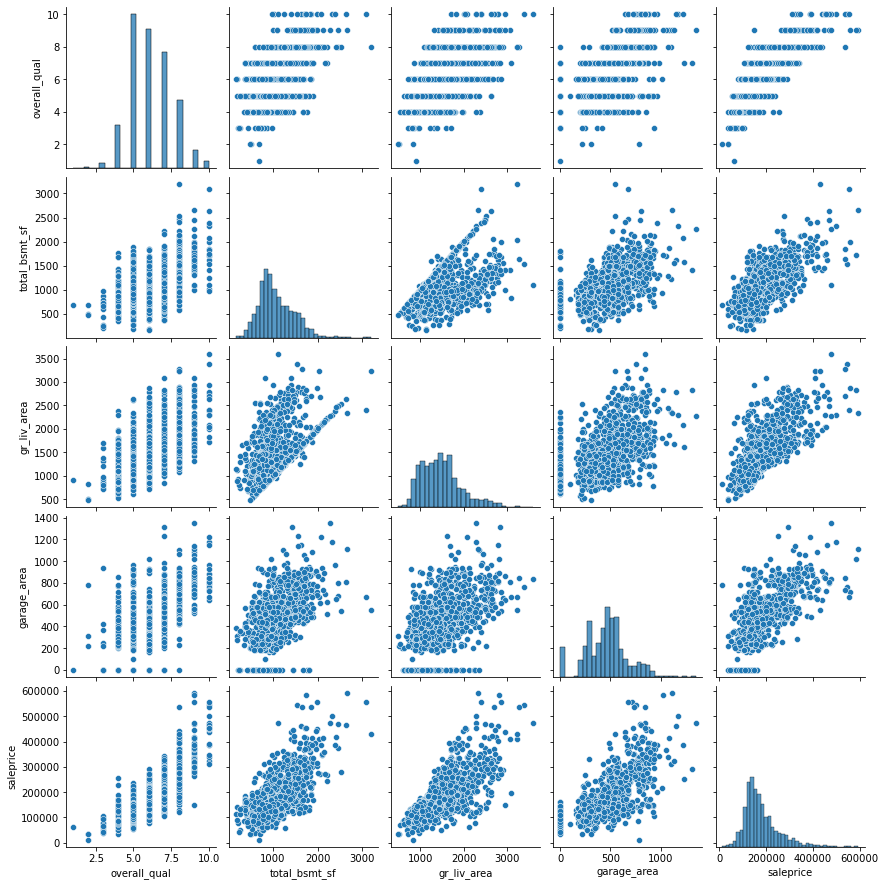

In [33]:
# Linearity:
sns.pairplot(pd.merge(X_train_df[['overall_qual', 'total_bsmt_sf', 'gr_liv_area', 'garage_area']], y_train, left_index = True, right_index = True));

In [34]:
# Independence of Errors:
# True by assumption

In [35]:
test_preds.shape

(591,)

In [36]:
train_preds.shape

(1376,)

In [37]:
y_train.shape

(1376,)

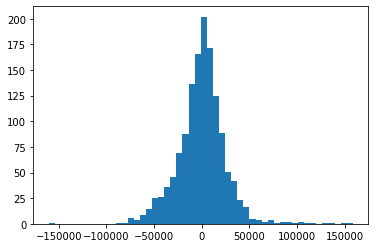

In [38]:
# Normality:
resids = y_train - train_preds 
plt.hist(resids, bins=50);

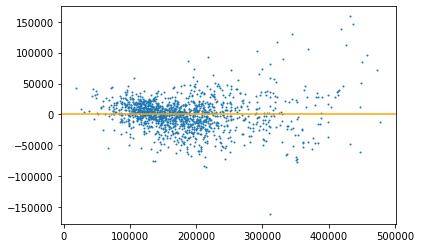

In [39]:
# Equality of Variances:
plt.scatter(train_preds, resids, s=1)
plt.axhline(0, color="orange");

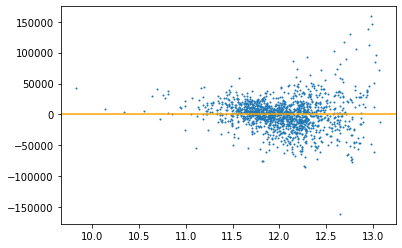

In [40]:
# Lets try a log transformation to see if the hint of heteroscedasitity disappears
plt.scatter(np.log(train_preds), resids, s=1)
plt.axhline(0, color="orange");

Log transformation makes heteroscedasitity worse!

In [41]:
# Independence of Predictors:
X_train_df[['overall_qual', 'total_bsmt_sf', 'gr_liv_area', 'garage_area']].corr()

,overall_qual,total_bsmt_sf,gr_liv_area,garage_area
overall_qual,1.000000,0.505618,0.578903,0.579099
total_bsmt_sf,0.505618,1.000000,0.433566,0.503592
gr_liv_area,0.578903,0.433566,1.000000,0.488163
garage_area,0.579099,0.503592,0.488163,1.000000


Nothing seems too correlated to be removed.

In [114]:
# code from: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# List of highest correlation pairs:

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [115]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train_df, 5))

Top Absolute Correlations
exter_qual_Gd      exter_qual_TA       0.895753
kitchen_qual_Gd    kitchen_qual_TA     0.839005
bsmt_qual_Gd       bsmt_qual_TA        0.792790
foundation_CBlock  foundation_PConc    0.791564
exter_qual_TA      kitchen_qual_TA     0.697060
dtype: float64


#### Lets drop "exter_qual_TA" to see if we can lower the variance of the model.

## MLR model 1.2: dropping "exter_qual_TA"

In [116]:
X_train.columns

Index(['overall_qual', 'total_bsmt_sf', 'gr_liv_area', 'garage_area',
       'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
       'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
       'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
       'exter_qual_Fa', 'exter_qual_Gd', 'exter_qual_TA', 'foundation_CBlock',
       'foundation_PConc', 'foundation_Stone', 'foundation_Wood',
       'bsmt_qual_Fa', 'bsmt_qual_Gd', 'bsmt_qual_Po', 'bsmt_qual_TA',
       'kitch

In [117]:
X_train_2 = X_train.drop(columns = ['exter_qual_TA'])

In [118]:
X_train_2.head()

,overall_qual,total_bsmt_sf,gr_liv_area,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,foundation_PConc,foundation_Stone,foundation_Wood,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
1304,6,1362.0,1362,504.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
774,4,572.0,572,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1814,5,1214.0,1214,461.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
613,7,798.0,1954,431.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1537,8,1141.0,2263,420.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [119]:
X_train.shape

(1376, 45)

In [120]:
X_train_2.shape

(1376, 44)

In [121]:
X_test_2 = X_test.drop(columns = ['exter_qual_TA'])

In [122]:
# Fit the model on training data
lr.fit(X_train_2, y_train)

LinearRegression()

In [123]:
# Training score (R2)
lr.score(X_train_2, y_train)

0.8869275365859806

In [124]:
# Testing score (R2)
lr.score(X_test_2, y_test)

0.8586125581684878

In [125]:
lr.fit(X_train, y_train) #Fit as before (MLR model 1.1)

LinearRegression()

#### Doesn't seem to help fix high variance and accuracy decreases! We will stick with MLR model 1.1.

## Ridge model:

In [44]:
# Ridge regressor lives here:
from sklearn.linear_model import Ridge, RidgeCV

Standarizing removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

"fit_transform()" is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. These learned parameters are then used to scale our test data.

In [45]:
# Instantiate a StandardScaler
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [46]:
#Instantiate
ridge_model = Ridge(alpha=10)

#Fit
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(f"Ridge Training R-Squared: {ridge_model.score(Z_train, y_train)}")
print(f"Ridge Testing R-Squared: {ridge_model.score(Z_test, y_test)}")

Ridge Training R-Squared: 0.8900415462723615
Ridge Testing R-Squared: 0.8655136022886891


In [47]:
# optimal alpha:

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha_

11.497569953977356

In [48]:
ridge_opt = Ridge(alpha=ridge_cv.alpha_)
ridge_opt.fit(Z_train, y_train)

print(f"Train score: {ridge_opt.score(Z_train, y_train)}")
print(f"Test score: {ridge_opt.score(Z_test, y_test)}")

Train score: 0.8900118912118964
Test score: 0.8655181086181791


In [49]:
ridge_opt.coef_

array([ 15680.38114297,  13301.6850277 ,  22311.69566128,   9312.47042282,
         -836.97108317,  -1419.7133734 ,    151.38682507,   2879.83421946,
         1532.79346237,   3814.94176849,  -2362.10552551,   2184.06961387,
         -634.92429438,   3483.36251596,  -2347.14981432,      0.        ,
        -1083.10665383,    872.34558594,   -329.95492609,  -1102.13100069,
         -747.39068049,   5981.31138689,   4649.39652938,  -4709.38389752,
         -883.37995846,    927.62593743,   -800.84897824,   1243.47976585,
         5011.32268376,   1403.44775641,   1555.80535238,  -4091.01461751,
       -14311.83901019, -16069.12866779,   3553.04537827,   5338.13675728,
          401.50319807,    807.86514963,  -4628.36906999, -13566.31574071,
            0.        , -14803.51594942,  -6499.96354005, -15213.4947026 ,
       -19422.88584566])

## Lasso model:

In [131]:
# Imports similar to Ridge
from sklearn.linear_model import Lasso, LassoCV

In [132]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, n_jobs=2, max_iter=50_000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

In [133]:
# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [134]:
print(f"LASSO Training R-Squared: {lasso_cv.score(Z_train, y_train)} ")
print(f"LASSO Testing R-Squared: {lasso_cv.score(Z_test, y_test)} ")

LASSO Training R-Squared: 0.8901453126226011 
LASSO Testing R-Squared: 0.865435439382612 


In [135]:
lr.fit(X_train, y_train)

LinearRegression()

In [136]:
X_train.shape

(1376, 45)

In [137]:
X_test.shape

(591, 45)

In [138]:
print(" MLR ".center(18, "="))
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))
print()
print(" Lasso ".center(18, "="))
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

====== MLR =======
0.8901453671638222
0.8654334420021894

===== Ridge ======
0.8900118912118964
0.8655181086181791

===== Lasso ======
0.8901453126226011
0.865435439382612


In [139]:
print('MLR difference =', 0.8901453671638222 - 0.8654334420021826)
print('Ridge difference =', 0.8900118912118964 - 0.8655181086181791)
print('Lasso difference =', 0.8901453126226011 - 0.865435439382612)

MLR difference = 0.02471192516163956
Ridge difference = 0.02449378259371726
Lasso difference = 0.024709873239989077


#### Ridge is the best model option because it's the most accurate regarding a train/test ratio.

# Creating Kaggle test csv

In [140]:
kaggle_sub_data = pd.read_csv('../datasets/test.csv')

In [141]:
#tenemos que cambiar las columns del kaggle
kaggle_sub_data.columns = [column.replace(' ', '_').lower() for column in kaggle_sub_data.columns]

In [158]:
kaggle_sub_d = kaggle_sub_data[['overall_qual', 'total_bsmt_sf', 'gr_liv_area', 'garage_area', 'neighborhood', 'exter_qual', 'foundation', 'bsmt_qual', 'kitchen_qual']].copy()

In [159]:
kaggle_sub_data_dummy = pd.get_dummies(kaggle_sub_d, columns = ['neighborhood', 'exter_qual', 'foundation', 'bsmt_qual', 'kitchen_qual'], drop_first = True)

In [161]:
kaggle_sub_d

,overall_qual,total_bsmt_sf,gr_liv_area,garage_area,neighborhood,exter_qual,foundation,bsmt_qual,kitchen_qual
0,6,1020,1928,440,OldTown,TA,Stone,Fa,Fa
1,5,1967,1967,580,Sawyer,TA,CBlock,Gd,TA
2,7,654,1496,426,Gilbert,Gd,PConc,Gd,Gd
3,5,968,968,480,OldTown,Gd,CBlock,TA,TA
4,6,1394,1394,514,NAmes,TA,CBlock,Gd,TA
...,...,...,...,...,...,...,...,...,...
873,6,1084,1877,488,NWAmes,TA,CBlock,TA,TA
874,6,1104,1988,480,NAmes,Gd,CBlock,TA,Gd
875,5,952,1211,322,Sawyer,TA,CBlock,TA,TA
876,4,864,864,528,NAmes,TA,PConc,TA,TA


In [162]:
kaggle_sub_data_dummy.columns

Index(['overall_qual', 'total_bsmt_sf', 'gr_liv_area', 'garage_area',
       'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker', 'exter_qual_Fa', 'exter_qual_Gd',
       'exter_qual_TA', 'foundation_CBlock', 'foundation_PConc',
       'foundation_Slab', 'foundation_Stone', 'foundation_Wood',
       'bsmt_qual_Fa', 'bsmt_qual_Gd', 'bsmt_qual_Po', 'bsmt_qual_TA',
       'kitchen_qual_Fa', 'kitchen_qual_Gd

In [163]:
kaggle_preds = ridge_opt.predict(kaggle_sub_data_dummy[kaggle_sub_data_dummy.columns])

In [164]:
#generate predictions

kaggle_preds = ridge_opt.predict(kaggle_sub_data_dummy[kaggle_sub_data_dummy.columns])

In [165]:
kaggle_sub_data_dummy
#we are missing our saleprice

,overall_qual,total_bsmt_sf,gr_liv_area,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,foundation_Stone,foundation_Wood,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA
0,6,1020,1928,440,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,5,1967,1967,580,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,7,654,1496,426,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,5,968,968,480,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,6,1394,1394,514,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,6,1084,1877,488,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
874,6,1104,1988,480,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
875,5,952,1211,322,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
876,4,864,864,528,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [166]:
# we need to add saleprice

kaggle_sub_data_dummy['saleprice'] = kaggle_preds

In [168]:
# we need to id's

kaggle_sub_data_dummy['id'] = kaggle_sub_data['id']

In [169]:
kaggle_sub_data_dummy.head()

,overall_qual,total_bsmt_sf,gr_liv_area,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA,saleprice,id
0,6,1020,1928,440,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,6.095063e+07,2658
1,5,1967,1967,580,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,7.566515e+07,2718
2,7,654,1496,426,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,4.631218e+07,2414
3,5,968,968,480,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3.917710e+07,1989
4,6,1394,1394,514,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,5.466337e+07,625


In [170]:
# solo quiero id y salerice para kaggle
kaggle_sub_data_dummy[['id', 'saleprice']]

,id,saleprice
0,2658,6.095063e+07
1,2718,7.566515e+07
2,2414,4.631218e+07
3,1989,3.917710e+07
4,625,5.466337e+07
...,...,...
873,1662,6.107965e+07
874,1234,6.376560e+07
875,1373,4.289831e+07
876,1672,3.589016e+07


In [171]:
# ahora lo paso a un csv
kaggle_sub_data_dummy[['id', 'saleprice']].to_csv('../datasets/kaggle_1stModel_sub.csv', index = False)